In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [13]:
def generate_ef_graph(results) :
    ef_data = []
    #bedroc_data = []
    for ranker in results :
        for percentage in results[ranker] :
            for fraction, value in results[ranker][percentage]['ef'].items() :
                ef_data.append([ranker, int(percentage), float(fraction), float(value)])
        #bedroc_data.append([ranker, float(results[ranker]['bedroc'])])
    columns = ['ranker', 'percentage', 'fraction', 'value']
    ef_df = pd.DataFrame(ef_data, columns=columns)
    ef_df = ef_df[ef_df['fraction'] == 0.2]
    ef_df = ef_df[ef_df['percentage'] <= 20]
    #plt.figure(figsize=(15, 8))
    sns.lineplot(data=ef_df, x='percentage', y='value', hue='ranker')
    plt.xlabel('Percentage of generated conformation')
    plt.ylabel('Enrichment factor')
    plt.ylim(0)

In [33]:
results_path = '/media/benoit/New Volume/data/gold_docking_dude/jak2/results_docking_score.json'
with open(results_path, 'r') as f :
    results = json.load(f)

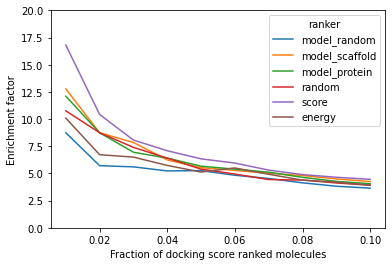

In [34]:
generate_ef_graph(results)
plt.ylim(0, 20)
plt.savefig(os.path.join('figures', 'VS_JAK2_flexible.png'), dpi=300)

In [35]:
results_path = '/media/benoit/New Volume/data/gold_docking_dude/jak2_rigid/results_docking_score.json'
with open(results_path, 'r') as f :
    results = json.load(f)

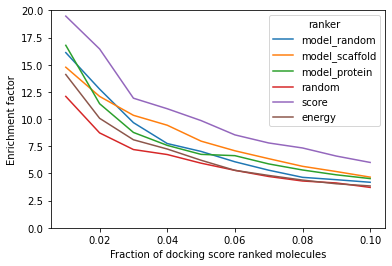

In [36]:
generate_ef_graph(results)
plt.ylim(0, 20)
plt.savefig(os.path.join('figures', 'VS_JAK2_rigid.png'), dpi=300)

In [41]:
from pdbbind_metadata_processor import PDBBindMetadataProcessor
pdbbind_metadata_processor = PDBBindMetadataProcessor()
table = pdbbind_metadata_processor.get_master_dataframe()

In [42]:
file_path = 'data/ligand_random_splits/train_smiles_random_split_0.txt'
with open(file_path, 'r') as f :
    random_split_smiles = f.readlines()
    random_split_smiles = [line.strip() for line in random_split_smiles]

In [44]:
smiles_data = pd.read_csv('data/smiles_df.csv')

In [46]:
training_pdbs = smiles_data[(smiles_data['smiles'].isin(random_split_smiles))
                           & (smiles_data['dataset'] == 'pdbbind')
                           & (smiles_data['included'])]['pdb_id'].values

In [49]:
training_table = table[table['PDB code'].isin(training_pdbs)]

In [53]:
training_table['protein name'].str.contains('JAK2').sum()

52

In [58]:
training_table['protein name'].unique()

array(['ACETYLGLUTAMATE KINASE', 'TRANSPORTER',
       'PEPTIDYL-PROLYL CIS-TRANS ISOMERASE A', ...,
       "5'-METHYLTHIOADENOSINE/S-ADENOSYLHOMOCYSTEINE NUCLE",
       'BIOTIN-BINDING PROTEIN A', 'XENAVIDIN'], dtype=object)

In [62]:
training_table[training_table['protein name'].str.contains('DOPAMINE')]

,PDB code,resolution,release year_x,-logKd/Ki,Kd/Ki,reference,ligand name,activity_list,sep,value,units,release year_y,Uniprot ID,protein name,active
18617,6iql,3.50,2019,9.37,Ki=0.43nM //,6iql.pdf,(L74),"[nM, =, 0.43]",=,0.43,nM,2019,P51436,"D(4) DOPAMINE RECEPTOR,SOLUBLE CYTOCHROME B562...",True


In [64]:
training_table[training_table['protein name'].str.contains('JAK2')].head()

,PDB code,resolution,release year_x,-logKd/Ki,Kd/Ki,reference,ligand name,activity_list,sep,value,units,release year_y,Uniprot ID,protein name,active
2657,5ut6,1.65,2017,4.24,Kd=57.3uM //,5ut4.pdf,(8MY),"[uM, =, 57.3]",=,57300.0,nM,2017,O60674,TYROSINE-PROTEIN KINASE JAK2,False
2960,5ut4,2.00,2017,4.38,Kd=42uM //,5ut4.pdf,(DQX),"[uM, =, 42]",=,42000.0,nM,2017,O60674,TYROSINE-PROTEIN KINASE JAK2,False
4045,4p7e,2.40,2014,4.76,IC50=17.5uM //,4p7e.pdf,(2HB),"[uM, =, 17.5]",=,17500.0,nM,2014,O60674,TYROSINE-PROTEIN KINASE JAK2,False
4417,5l3a,1.98,2016,4.89,Kd=13uM //,5l3a.pdf,(6DP),"[uM, =, 13]",=,13000.0,nM,2016,O60674,TYROSINE-PROTEIN KINASE JAK2,False
7640,5ut0,2.10,2017,5.88,Kd=1323nM //,5usy.pdf,(35R),"[nM, =, 1323]",=,1323.0,nM,2017,O60674,TYROSINE-PROTEIN KINASE JAK2,False


In [14]:
results_path = 'gold_docking_dude/drd3/results_docking_score.json'
with open(results_path, 'r') as f :
    results = json.load(f)

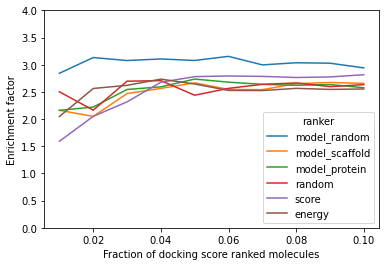

In [38]:
generate_ef_graph(results)
plt.ylim(0, 4)
plt.savefig(os.path.join('figures', 'VS_DRD3_flexible.png'), dpi=300)

In [17]:
results_path = 'gold_docking_dude/drd3_rigid/results_docking_score_percentage.json'
with open(results_path, 'r') as f :
    results = json.load(f)

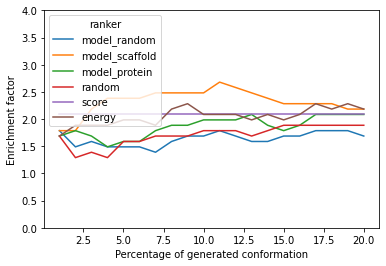

In [18]:
generate_ef_graph(results)
plt.ylim(0, 4)
plt.savefig(os.path.join('figures', 'VS_DRD3_rigid_percentage.png'), dpi=300)

In [22]:
columns = ['ranker', 'value']
bedroc_df = pd.DataFrame(bedroc_data, columns=columns)

<AxesSubplot:xlabel='ranker', ylabel='value'>

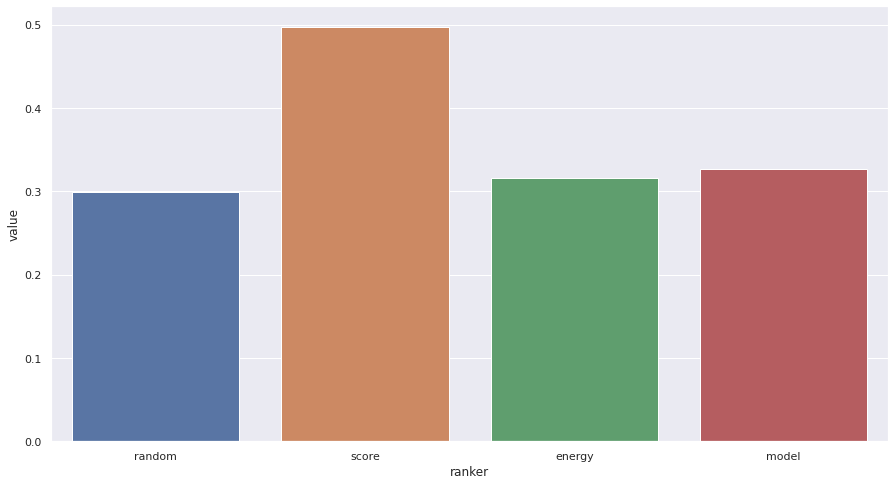

In [23]:
sns.barplot(data=bedroc_df, x='ranker', y='value')

In [10]:
results_path = 'gold_docking_dude/jak2_rigid/results_custom_score.json'
with open(results_path, 'r') as f :
    results = json.load(f)

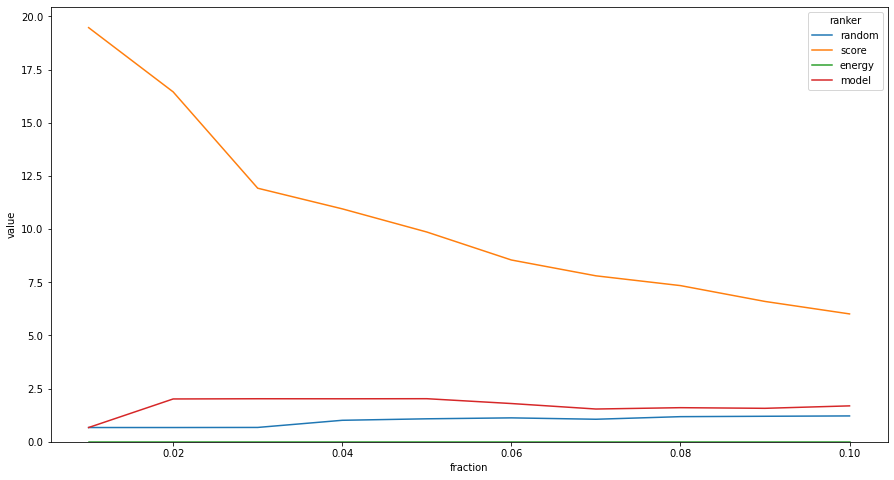

In [11]:
generate_ef_graph(results)